# Ejercicios con Árboles de Decisión
En este notebook vas a practicar cómo entrenar y visualizar árboles de decisión aplicados a problemas simples y cotidianos.
Completá el código en las celdas indicadas según las instrucciones.

## Ejercicio 1: Clasificación de Préstamos Bancarios

In [18]:

# PASO 1: Crear el DataFrame con los siguientes datos

# Columnas: ingresos, antiguedad_laboral, monto_prestamo, otras_deudas, aprobado
# Completá el DataFrame a continuación

import pandas as pd

data_prestamos = pd.read_csv('https://raw.githubusercontent.com/ULP-UGD/Programacion_Avanzada/refs/heads/main/TP13/prestamos.csv')

data_prestamos.head()


,ingresos,antiguedad_laboral,monto_prestamo,otras_deudas,aprobado
0,35000,2,10000,no,1
1,50000,5,15000,sí,1
2,20000,1,5000,no,0
3,80000,10,20000,sí,1
4,15000,0,3000,no,0


In [19]:
# PASO 2: Separar variables independientes (X) y dependiente (y)

# Convierte la columna 'otras_deudas' a valores numéricos
data_prestamos['otras_deudas'] = data_prestamos['otras_deudas'].apply(lambda x: 1 if x == 'sí' else 0)

# Selecciona las columnas de características para X
X = data_prestamos[['ingresos', 'antiguedad_laboral', 'monto_prestamo', 'otras_deudas']]

# Selecciona la columna objetivo para y
y = data_prestamos['aprobado']

In [30]:
# PASO 3: Separar en entrenamiento y prueba

from sklearn.model_selection import train_test_split

# Divide los datos, usando un 20% para el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# PASO 4: Entrenar el árbol y mostrar el reporte

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Crea una instancia del clasificador de árbol de decisión
modelo = DecisionTreeClassifier(random_state=42)

# Entrena el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realiza predicciones sobre los datos de prueba
y_pred = modelo.predict(X_test)

# Muestra el reporte de clasificación comparando los valores reales (y_test) con las predicciones (y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



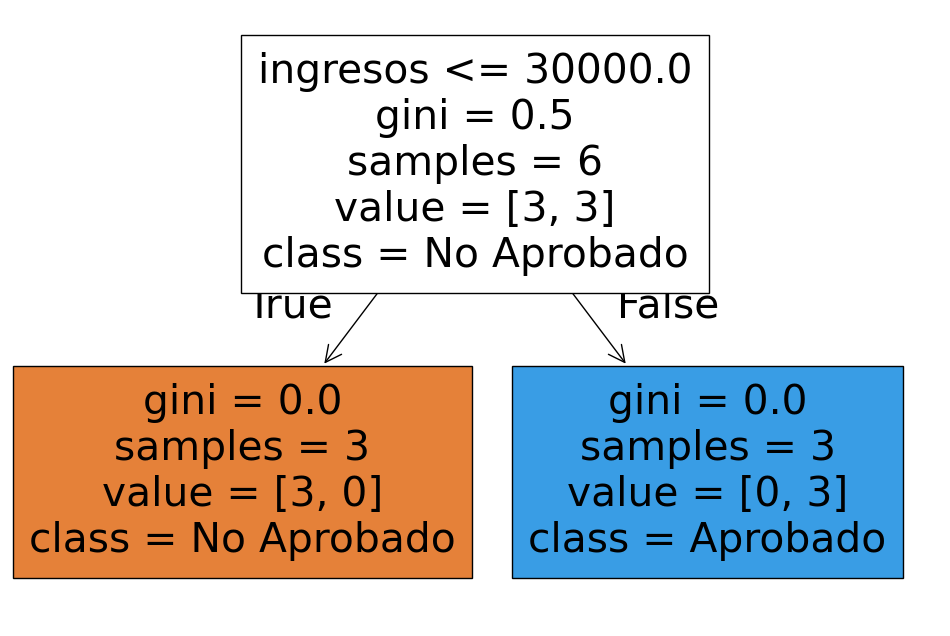

In [22]:
# PASO 5: Visualizar el árbol

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))

# Dibuja el árbol entrenado
plot_tree(modelo,
          filled=True,
          feature_names=X.columns.tolist(),
          class_names=['No Aprobado', 'Aprobado'])

plt.show()

## Ejercicio 2: Diagnóstico de Enfermedad por Síntomas

In [25]:

# PASO 1: Crear DataFrame con síntomas y diagnóstico

# Columnas: fiebre, tos, dolor_muscular, fatiga, contacto_estrecho, diagnostico

data_salud = pd.read_csv('https://raw.githubusercontent.com/ULP-UGD/Programacion_Avanzada/refs/heads/main/TP13/diagnostico.csv')

data_salud.head()

,edad,fiebre,tos,dolor_cabeza,diagnostico
0,25,sí,sí,no,1
1,34,no,sí,sí,0
2,45,sí,sí,sí,1
3,52,sí,no,sí,1
4,29,no,no,no,0


In [26]:
# Convierte todas las columnas categóricas a numéricas
for col in ['fiebre', 'tos', 'dolor_cabeza']:
    data_salud[col] = data_salud[col].apply(lambda x: 1 if x == 'sí' else 0)

# PASO 2: Separar X e y

# Selecciona las columnas de características (síntomas)
X = data_salud[['edad', 'fiebre', 'tos', 'dolor_cabeza']]

# Selecciona la columna objetivo (diagnóstico)
y = data_salud['diagnostico']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



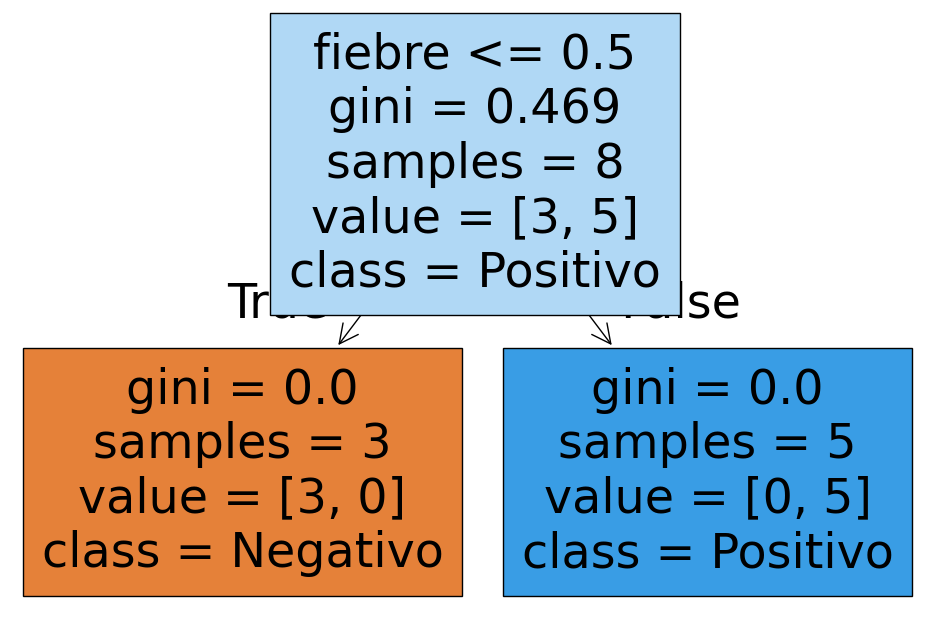

In [29]:
# PASO 3: Entrenar y visualizar árbol de decisión

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Crea una instancia del clasificador con una profundidad máxima de 3
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrena el modelo con todos los datos
modelo.fit(X, y)

# Realiza predicciones sobre los mismos datos de entrenamiento
y_pred = modelo.predict(X)

# Muestra el reporte de clasificación
# Nota: Evaluar sobre los mismos datos de entrenamiento no es una práctica estándar,
# pero seguimos las instrucciones del ejercicio.
print(classification_report(y, y_pred))

# Visualiza el árbol
plt.figure(figsize=(12, 8))
plot_tree(modelo,
          filled=True,
          feature_names=X.columns.tolist(),
          class_names=['Negativo', 'Positivo'])
plt.show()